![KPMG logo](https://th.bing.com/th/id/OIP.FAkgKvaU8I825ap8Gd_OggAAAA?pid=ImgDet&rs=1)

# KPMG VIRTUAL INTERNSHIP
### Sprocket Central Pty Ltd
Dataset has been provided by KPMG virtual internship through Forage. See [Forage.com](forage.com) for more details

### Objectives:
In this lab:
* The tables for Sprocket will be loaded independently to identify all data quality issues
* Identify missing data in the tables
* Identify duplicate entries in the table
* Check the accuracy and consistencies of the entry
* Disucuss Inferences and recommendation for Data quality and integrity


In [3]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib as mpt


In [45]:
#load dataset into lab and store in pandas dataframe 
# NB: For purpose of independent analysis, tables have been stored seperately as csv files using Excel

cusadd=pd.read_csv('customer_address.csv',header=1)
newcus=pd.read_csv('New_customer_list.csv',header=1)
cusdem=pd.read_csv('customer_dem.csv',header=1)
trndat=pd.read_csv('transaction_data.csv',header=1)

##### Wrangling Transaction Data Table

In [46]:

#check the column and attribute structure of the data
trndat.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


##### Inference: _The column 'Product First Sold Date' requires some clarification to understand how attribute on the rows, and the appropriate data type to assign them._

In [48]:
#let us check for errors in the table

#identify column headers and their attributes
entry=trndat.shape
col=trndat.dtypes
print(f'data entry:\n{entry}')
print(f'Column type:\n{col}')

data entry:
(20000, 13)
Column type:
transaction_id               int64
product_id                   int64
customer_id                  int64
transaction_date            object
online_order                object
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                 float64
standard_cost               object
product_first_sold_date    float64
dtype: object


##### Inference: _from the results we can see that there are 2000 row entries and 13 columns in the table. We also find that the transaction date is not formatted as a date type_

In [49]:
#check for missing entries in rows
missing=trndat.isnull().sum()
print(missing)

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


##### Inference: 
* There are 360 null entries for Online order
* 197 null entries for the columns brand, Product Line, product class,Product size, Standard cost, and Product First Sold Date.



In [51]:
#check for duplicate entries in row
duplicate=trndat.duplicated().sum()
print(duplicate)

0


##### Inference: _There are no duplicate entries in the Transaction table_

In [53]:
#check data accuracy and consistency in Transaction table
uniquebrand=trndat['brand'].unique()
uniquesize=trndat['product_size'].unique()
uniquepl=trndat['product_line'].unique()
uniquepc=trndat['product_class'].unique()


print(f'Unique brand:{uniquebrand}\nUnique Product Size:{uniquesize}\nUnique Product Line:{uniquepl}\nUnique Product Class:{uniquepc}')

Unique brand:['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
Unique Product Size:['medium' 'large' 'small' nan]
Unique Product Line:['Standard' 'Road' 'Mountain' 'Touring' nan]
Unique Product Class:['medium' 'low' 'high' nan]


##### Inference:
* Null values are identified in the columns: Brand, Product Size, Product Line, and Product Class.

##### Wrangling the Customer Demographic Data

In [55]:
#check the column and attribute structure of the data
cusdem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


##### Inference: The column 'default' can be dropped from the table as it records no significant nor identifiable attribute to the table

##### Wrangling Customer Address Table

In [56]:
#let us check for errors in the customer address table

#identify column headers and their attributes
entry=cusdem.shape
col=cusdem.dtypes
print(f'data entry:\n{entry}')
print(f'Column type:\n{col}')

data entry:
(4000, 13)
Column type:
customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
default                                 object
owns_car                                object
tenure                                 float64
dtype: object


##### Inference: There are 4000 row entries and 13 columns in the table, implying 4000 customers data has been recorded in 14 different categories on the table

In [57]:
#check for missing entries in rows
missing=cusdem.isnull().sum()
print(f'Missing Data:\n{missing}')

#check for duplicate entries in row
duplicate=cusdem.duplicated().sum()
print('Duplicate:',duplicate)

Missing Data:
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64
Duplicate: 0


#### Inference: 
Out of the 4000 customer entries:
* 125 failed to record their Last Names
* 87 entries are missing for Date Of Birth
* 506 null entries for Job Title
* 656 missing data for Job Industry Category
* 302 data missing in the Default column we suggested to drop
* 87 data entries are null for Tenure

In [58]:
#rLets us check for data accuracy and consistency by checking unique characters in the table
uniqueind=cusdem['job_industry_category'].unique()
uniquegen=cusdem['gender'].unique()
uniquewel=cusdem['wealth_segment'].unique()
uniquestate=cusadd['state'].unique()
uniquecountry=cusadd['country'].unique()

print(f'Unique Industry:{uniqueind}\nUnique Gender:{uniquegen}\nUnique Wealth Segment:{uniquewel}\nUnique State:{uniquestate}\nUnique Country:{uniquecountry}')

Unique Industry:['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
Unique Gender:['F' 'Male' 'Female' 'U' 'Femal' 'M']
Unique Wealth Segment:['Mass Customer' 'Affluent Customer' 'High Net Worth']
Unique State:['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
Unique Country:['Australia']


#### Inference:
From the result above, we find that:
* Job Industry has some null values in the entries
* Gender column has 'F' and 'M' values representing female and male respectively, this entries needs to be normalized. It also appears an entry misspeled Female as 'Femal'. We also need to clarify what the 'U' stands for, for fear of misgendering.
* State column has the entry 'New South Wales' and 'NSW' we will have to normalize these entries to be one single description

In [59]:
#Lets investigate the date column
#convert column to date type
cusdem['DOB']=pd.to_datetime(cusdem['DOB'])

#lets create a new column to seperate the year
cusdem['DOB_Year']=cusdem['DOB'].dt.year

#get statistics for year
cusdem['DOB_Year'].describe()

count    3913.000000
mean     1977.030667
std        12.796387
min      1843.000000
25%      1968.000000
50%      1977.000000
75%      1987.000000
max      2002.000000
Name: DOB_Year, dtype: float64

##### Inference: _The statitistics shows that there is an entry of '1843' for the Date of Birth column. This year equals the age '175' and must have been entered as a numerical error_

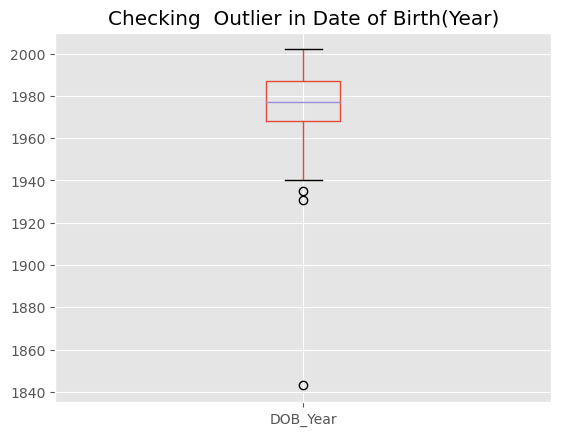

In [60]:
# let's investigate the table further with a boxplot of the year column
import seaborn as sns #to visualize data
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')


data=cusdem['DOB_Year']

data.plot(kind='box')
plt.title('Checking  Outlier in Date of Birth(Year)')
plt.show()

##### Inference: Further investigations through the box plot have stregthened our claim that this outlier is an error

In [24]:
#let us check for errors in the customer address table

#identify column headers and their attributes
entry=cusadd.shape
col=cusadd.dtypes
print(f'data entry:\n{entry}')
print(f'Column type:\n{col}')

data entry:
(3999, 6)
Column type:
customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object


##### inference: The customer address table has 3999 row entries and 6 columns, as a copliment to the customer demographic table, this implies a missing customer ID

In [26]:
#check for missing entries in rows
missing=cusadd.isnull().sum()
print(missing)

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64


##### Inference: Customers are particular about their address as there are no null entries in the customer address data

In [28]:
#check for duplicate entries in row
duplicate=cusadd.duplicated().sum()
print(duplicate)

0


##### Inference: Interestingly, there are no duplicate entries as well

In [30]:
#retreive data accuracy by checking unique Keys and their pairs
uniqueadd=cusadd['address'].unique()
uniquestate=cusadd['state'].unique()
uniquecountry=cusadd['country'].unique()

print(f'Unique address:{uniqueadd}\nUnique State:{uniquestate}\nUnique Country:{uniquecountry}')

Unique address:['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']
Unique State:['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
Unique Country:['Australia']


##### Inference: We find here that there is also a preference in entering 'New South Wales' and 'NSW', we will have to normalize this entry for exploratory purpose

_It is important to merge the Customer Demographic table with the Customer address table to maintain a single table of data_


In [62]:
#we can acheive this by:
CustomerData= pd.merge(cusadd,cusdem, on='customer_id',how='left')

#print the new twable
CustomerData.head()

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,DOB_Year
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,1953.0
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,1980.0
2,4,0 Holy Cross Court,4211,QLD,Australia,9,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,1961.0
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,1977.0
4,6,9 Oakridge Court,3216,VIC,Australia,9,Curr,Duckhouse,Male,35.0,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,1966.0


##### Inference: Now the table is in good shape for more wrangling and exploration, It is now also consistent with the New customer's table

##### Wrangling New customer list


In [32]:
#check the column and attribute structure of the data
newcus.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6.0,1.09,1.3625,1.703125,1.447656,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11.0,0.69,0.6900,0.862500,0.733125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5.0,0.46,0.4600,0.460000,0.460000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1.0,0.91,1.1375,1.137500,1.137500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9.0,0.79,0.7900,0.987500,0.987500,4,4,1.703125


##### Inference: We require clarity or definition of the unnamed columns. If this can not be possible, it is best to drop the column 

In [34]:
#let us check for errors in the New customer list table

#identify column headers and their attributes
entry=newcus.shape
col=newcus.dtypes
print(f'data entry:\n{entry}')
print(f'Column type:\n{col}')

data entry:
(1000, 23)
Column type:
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                   int64
address                                 object
postcode                                 int64
state                                   object
country                                 object
property_valuation                     float64
Unnamed: 16                            float64
Unnamed: 17                            float64
Unnamed: 18                            float64
Unnamed: 19                            float64
Unnamed: 20             

##### Inference: The table contains 1000 rows and 13 columns, implying that 1000 new customers have been converted

In [35]:
#check for missing entries in rows
missing=newcus.isnull().sum()
print(missing)

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [ ]:
##### Inference: 
The result shows that:
* 29 customers did not include their last names
* Entries are missing 17 times on the Date of Birth columnn
* 106 customers left out their Job title
* There are no entries for 165 job industry Category column

In [36]:
#check for duplicate entries in row
duplicate=newcus.duplicated().sum()
print(duplicate)

0


##### The new customers are unique, thus no duplicate was found

In [37]:
#retreive data accuracy by checking unique Keys and their pairs
uniquestate=newcus['state'].unique()
uniquecountry=newcus['country'].unique()
uniquegen=newcus['gender'].unique()
uniqueind=newcus['job_industry_category'].unique()

print(f'Unique State:{uniquestate}\nUnique Country:{uniquecountry}\nUnique Gender: {uniquegen}\n Unique Industry:{uniqueind}')

Unique State:['QLD' 'NSW' 'VIC']
Unique Country:['Australia']
Unique Gender: ['Male' 'Female' 'U']
 Unique Industry:['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' nan 'Argiculture']


##### Inference:
* New customer table maintained 'NSW' as the state entry
* 'U' gender appeared again
* There are null values for Industry column

In [39]:
#let us investigate the numeric entries
newcus['DOB']=pd.to_datetime(newcus['DOB']) #add a year column to include in the numeric observation
newcus['DOB_Year']=newcus['DOB'].dt.year
newcus.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,DOB_Year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,983.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.754450,0.845992,0.95051,0.877598,498.819000,498.819000,0.881714,1970.793489
std,27.796686,5.037145,848.895767,2.758804,0.201198,0.241846,0.28725,0.273437,288.810997,288.810997,0.293525,17.074268
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.40000,0.357000,1.000000,1.000000,0.340000,1938.000000
25%,26.750000,7.000000,2209.000000,6.000000,0.580000,0.650000,0.72500,0.663000,250.000000,250.000000,0.649531,1957.000000
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.830000,0.92500,0.850000,500.000000,500.000000,0.860000,1972.000000
75%,72.000000,15.000000,3845.500000,9.000000,0.930000,1.020000,1.15000,1.062500,750.250000,750.250000,1.075000,1983.000000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.71875,1.703125,1000.000000,1000.000000,1.718750,2002.000000


##### Inference: The new Customers Table shows that there is a consistent age range from 1938 till 2002

#### Conclusion
Through the data wrangling process of the Sprocket center historic data:
* We found missing values that needs to be worked on
* Unique values of entries that needs to be further clarified
* We found anomalies that can be described as an error
* The data cleaning will be commenced before moving to the next phase of exploring the data.

### Author
[Micheal Stephen](https://www.linkedin.com/in/stephen-micheal-19638b254/)

08/09/2023